In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/dengai-dataset/DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv
/kaggle/input/dengai-dataset/DengAI_Predicting_Disease_Spread_-_Submission_Format.csv
/kaggle/input/dengai-dataset/DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv
/kaggle/input/dengai-dataset/DengAI_Predicting_Disease_Spread_-_Test_Data_Features.csv


In [3]:
train_data_features = pd.read_csv("/kaggle/input/dengai-dataset/DengAI_Predicting_Disease_Spread_-_Training_Data_Features.csv")
train_data_features['cases'] = pd.read_csv("/kaggle/input/dengai-dataset/DengAI_Predicting_Disease_Spread_-_Training_Data_Labels.csv", usecols=[3])
test_data_features = pd.read_csv("/kaggle/input/dengai-dataset/DengAI_Predicting_Disease_Spread_-_Test_Data_Features.csv")

In [4]:
train_data_features

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


In [5]:
(train_data_features.isnull().sum()/len(train_data_features))*100

city                                      0.000000
year                                      0.000000
weekofyear                                0.000000
week_start_date                           0.000000
ndvi_ne                                  13.324176
ndvi_nw                                   3.571429
ndvi_se                                   1.510989
ndvi_sw                                   1.510989
precipitation_amt_mm                      0.892857
reanalysis_air_temp_k                     0.686813
reanalysis_avg_temp_k                     0.686813
reanalysis_dew_point_temp_k               0.686813
reanalysis_max_air_temp_k                 0.686813
reanalysis_min_air_temp_k                 0.686813
reanalysis_precip_amt_kg_per_m2           0.686813
reanalysis_relative_humidity_percent      0.686813
reanalysis_sat_precip_amt_mm              0.892857
reanalysis_specific_humidity_g_per_kg     0.686813
reanalysis_tdtr_k                         0.686813
station_avg_temp_c             

In [6]:
(test_data_features.isnull().sum()/len(test_data_features))*100

city                                      0.000000
year                                      0.000000
weekofyear                                0.000000
week_start_date                           0.000000
ndvi_ne                                  10.336538
ndvi_nw                                   2.644231
ndvi_se                                   0.240385
ndvi_sw                                   0.240385
precipitation_amt_mm                      0.480769
reanalysis_air_temp_k                     0.480769
reanalysis_avg_temp_k                     0.480769
reanalysis_dew_point_temp_k               0.480769
reanalysis_max_air_temp_k                 0.480769
reanalysis_min_air_temp_k                 0.480769
reanalysis_precip_amt_kg_per_m2           0.480769
reanalysis_relative_humidity_percent      0.480769
reanalysis_sat_precip_amt_mm              0.480769
reanalysis_specific_humidity_g_per_kg     0.480769
reanalysis_tdtr_k                         0.480769
station_avg_temp_c             

In [7]:
train_data_features.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
test_data_features.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)

In [8]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();

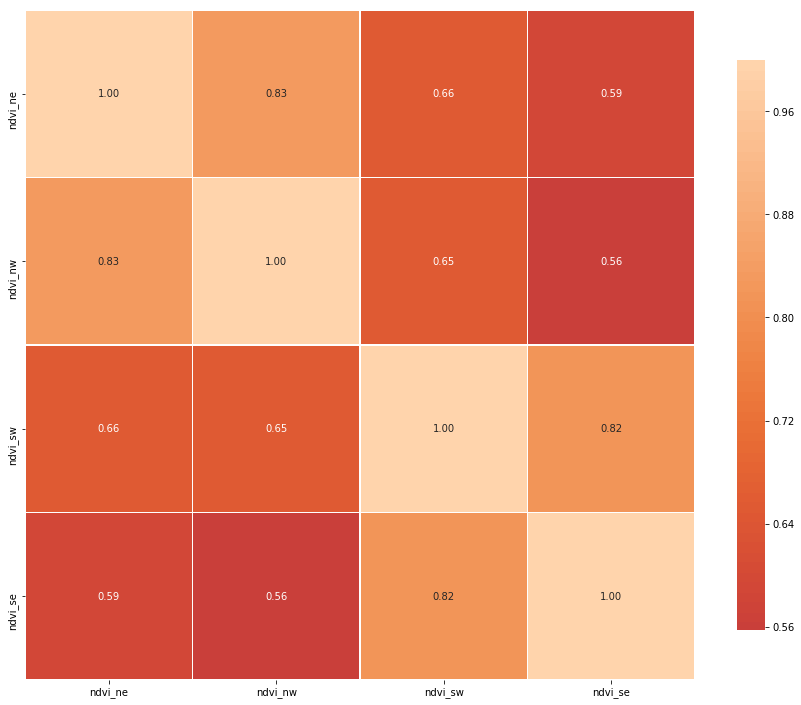

In [9]:
ndvi_variables = train_data_features[['ndvi_ne', 'ndvi_nw', 'ndvi_sw', 'ndvi_se']]
correlation_heatmap(ndvi_variables)

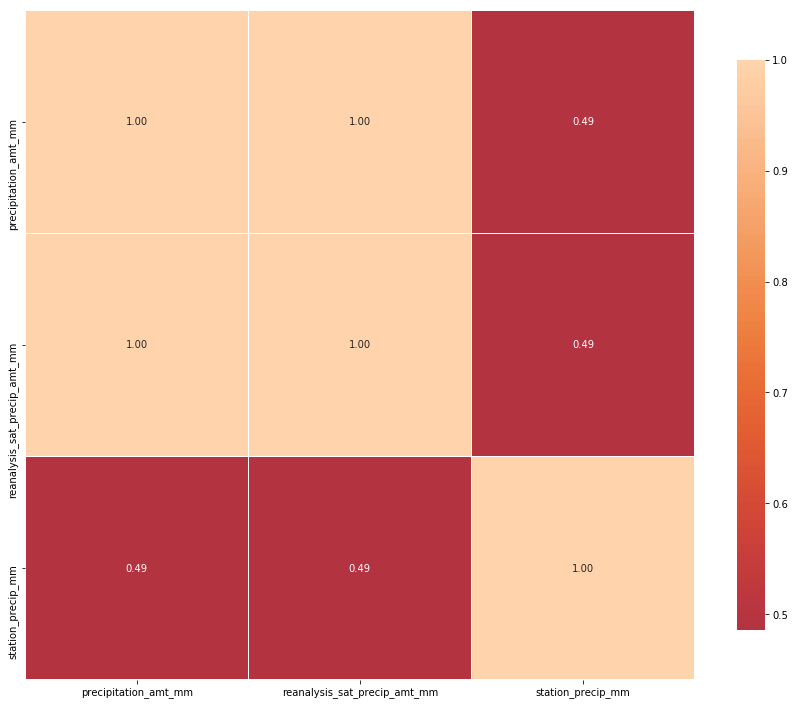

In [10]:
precipitation_variables = train_data_features[['precipitation_amt_mm', 'reanalysis_sat_precip_amt_mm', 'station_precip_mm']]
correlation_heatmap(precipitation_variables)

In [11]:
min_max_scaler = preprocessing.MinMaxScaler()

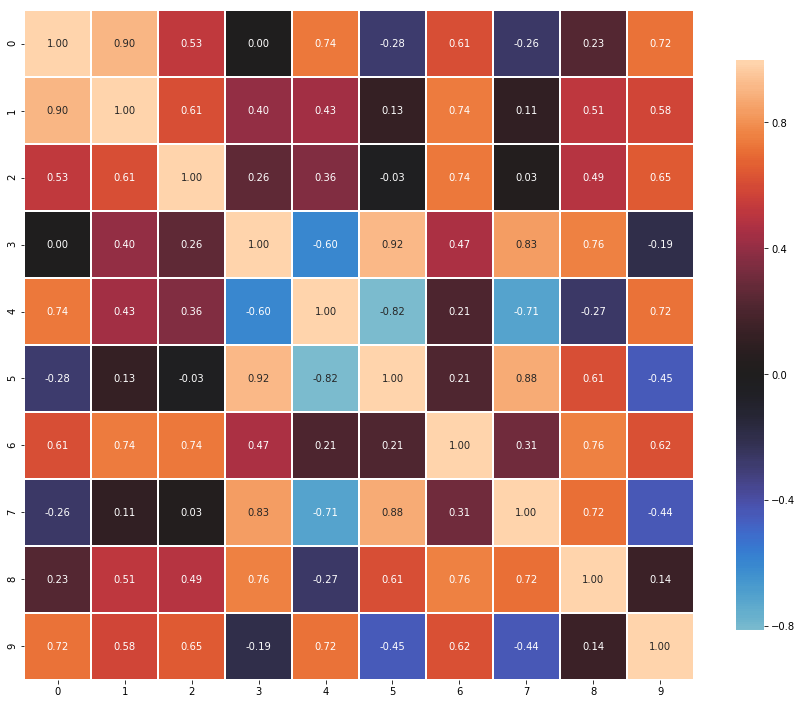

In [12]:
temperature = train_data_features[['reanalysis_air_temp_k', 'reanalysis_avg_temp_k','reanalysis_dew_point_temp_k',
                                  'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k','reanalysis_tdtr_k','station_avg_temp_c',
                                   'station_diur_temp_rng_c', 'station_max_temp_c','station_min_temp_c']]
temperature = min_max_scaler.fit_transform(temperature)
temperature = pd.DataFrame(temperature)
correlation_heatmap(temperature)

In [13]:
corr_matrix = train_data_features.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [c for c in upper.columns if any(upper[c] > 0.98)]
del upper

print('drop SIMILAR columns:', to_drop)
train_data_features.drop(to_drop,1,inplace=True)

drop SIMILAR columns: ['reanalysis_sat_precip_amt_mm', 'reanalysis_specific_humidity_g_per_kg']
